[View in Colaboratory](https://colab.research.google.com/github/jeffreyrnorton/MachineLearningNotes/blob/master/Feed_Forward_Network.ipynb)

# Feed Forward Network with Keras

This is an example of a Feed Forward network with Keras following the work done by [David Sheehan](https://dashee87.github.io/data%20science/deep%20learning/python/another-keras-tutorial-for-neural-network-beginners/).  In this example, we use data on diabetes among the Pima Indians to classify and predict the occurence of diabetes.

Import the libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


There may be a trick with pytdot below - it may be necessary to install and then restart the vm so that it can be used.



In [0]:
!pip install -q pydot

Get the dataset.  The dataset was originally at the UCI dataset repository, but was removed.  But it is (for now) available on github.

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

In [3]:
# fix random seed for reproducibility
seed = 155
np.random.seed(seed)

# load pima indians dataset
# download directly from website
dataset = pd.read_csv("https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv", 
                      header=None, skiprows=9).values
# import from local directory
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])



```
Split into training and testing data.
```



In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], 
                                                    test_size=0.25, random_state=87)

A feed forward network is a dense network with one hidden layer.  This is a classification problem with only two classes (yes or no), so the selected loss function is cross entropy (binary).  For regression, we would use loss.

With Keras, it is not necessary to explicitly create the input layer. Instead, specify the number of neurons (or features) that feed into the first hidden layer. It is not necessary to designate the input dimensions for subsequent layers, as the neurons in the previous layer form the input for the next layer. We’ve opted for 5 neurons in the hidden layer. The output has one neuron as it’s a binary classification problem (probability of belonging to positive group).

The activation argument decides (unsurprisingly) the activation function for that layer. A less circular explanation is that activation functions combine the neuron inputs to produce an output. For example, a step function would mean a neuron fires (has a non-zero value) if the input values exceed a certain threshold. Various activation functions are described here. The optimizer is ```adam```.  ```adam``` stands for Adaptive Moment Estimation; it’s how the model tunes its parameters in order to minimise the training error (a good overview of deep learning optimization functions can be found here).

Because we plan on trying different sizes of the hidden layer, we will create a function to avoid unnecessary code.

In [0]:
def run_model(hidden_layer_size, epochs=1000):
    np.random.seed(seed)
    model = Sequential() # create model
    model.add(Dense(hidden_layer_size, input_dim=8, activation='relu')) # hidden layer
    model.add(Dense(1, activation='sigmoid')) # output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model
    # verbose=0 suppresses the file writing message
    # note that the fit method expects a list of callbacks
    test_over_time = []
    fitting_log = {'loss':[], 'acc':[]}
    for i in range(epochs):
        res = model.fit(X_train, Y_train, epochs=1, verbose=0, batch_size=X_train.shape[0],
                        initial_epoch=0)
        fitting_log['loss'].append(res.history['loss'][0])
        fitting_log['acc'].append(res.history['acc'][0])
        scores = model.evaluate(X_test, Y_test, verbose=0)
        test_over_time.append(scores)
    
    # [loss, accuracy]
    loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    return model, fitting_log, test_over_time, loss, accuracy

In [0]:
def plot_nn(fitted_log, test_over_time):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(range(len(fitted_log['loss'])), fitted_log['loss'],linestyle='-', color='blue',label='Training', lw=2)
    ax1.plot(range(len(np.array(test_over_time)[:,0])), np.array(test_over_time)[:,0], linestyle='-', color='green',label='Test', lw=2)
    ax2.plot(range(len(fitted_log['acc'])), fitted_log['acc'],linestyle='-', color='blue',label='Training', lw=2)
    ax2.plot(range(len(np.array(test_over_time)[:,1])), np.array(test_over_time)[:,1], linestyle='-', color='green',label='Test', lw=2)
    leg = ax1.legend(bbox_to_anchor=(0.7, 0.9), loc=2, borderaxespad=0.,fontsize=13)
    ax1.set_xticklabels('')
    #ax1.set_yscale('log')
    ax2.set_xlabel('# Epochs',fontsize=14)
    ax1.set_ylabel('Loss',fontsize=14)
    ax2.set_ylabel('Accuracy',fontsize=14)
    plt.show()

In [0]:
def output_results(model, fitting_log, test_over_time, loss, accuracy):
    # Print a summary of the model
    print(model.summary())
    # A graph of the model (optional)

    # Print the fitting log
    nepochs = len(fitting_log['loss'])
    print('Training loss, accuracy:', [fitting_log['loss'][nepochs-2:nepochs-1], fitting_log['acc'][nepochs-2:nepochs-1]])
    print('Testing loss, accuracy: {} {}'.format(loss, accuracy))
    plot_nn(fitting_log, test_over_time)
    

In [0]:
model_5, fitting_log_5, test_over_time_5, loss_5, accuracy_5 = run_model(5)

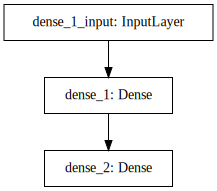

In [9]:
SVG(model_to_dot(model_5).create(prog='dot', format='svg'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None
Training loss, accuracy: [[0.538553774356842], [0.7413194179534912]]
Testing loss, accuracy: 0.5907431195179621 0.703125


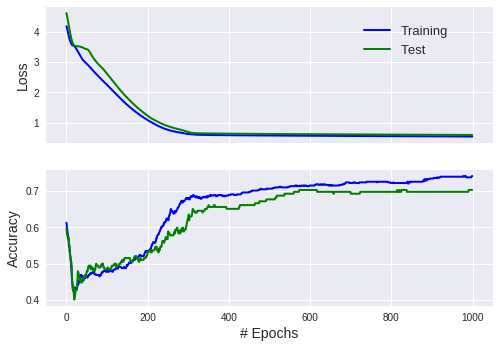

In [10]:
output_results(model_5, fitting_log_5, test_over_time_5, loss_5, accuracy_5)


With 5 nodes in the hidden layer, we have a training accuracy of 74% and a testing accuracy of 70%.  Let's try some different sized hidden layers.

In [0]:
model_100, fitting_log_100, test_over_time_100, loss_100, accuracy_100 = run_model(100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________
None
Training loss, accuracy: [[0.35574567317962646], [0.8385416865348816]]
Testing loss, accuracy: 0.5729342897733053 0.7604166666666666


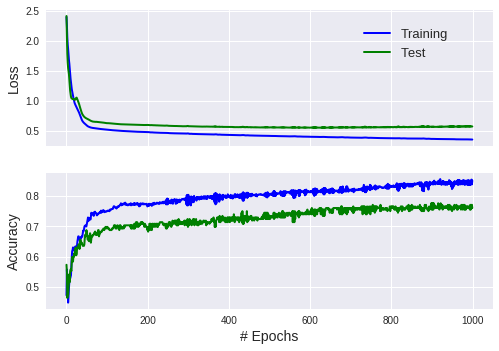

In [12]:
output_results(model_100, fitting_log_100, test_over_time_100, loss_100, accuracy_100)


With 100 nodes in the hidden layer, we have 85% training accuracy and 77% testing accuracy which is a good improvement over the hidden layer of 5 nodes.

In [0]:
model_500, fitting_log_500, test_over_time_500, loss_500, accuracy_500 = run_model(500)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               4500      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 501       
Total params: 5,001
Trainable params: 5,001
Non-trainable params: 0
_________________________________________________________________
None
Training loss, accuracy: [[0.2596954107284546], [0.9027777910232544]]
Testing loss, accuracy: 0.6458814491828283 0.7552083333333334


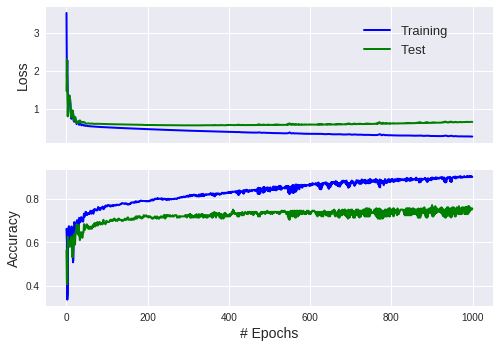

In [14]:
output_results(model_500, fitting_log_500, test_over_time_500, loss_500, accuracy_500)


At 1000 nodes, we have an improved training accuracy (at 90%), *but* the testing accuracy has gone down to 76%.  This is a sign of overfitting.